# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 17 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')

%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [17]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [18]:
from scipy.stats import uniform

N = 10000

# Сгенерируем выборку для theta = 1
theta = 1
sample = uniform.rvs(size=N, scale=theta)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [19]:
# найдем оценку для всех n
sample_mean = sample.cumsum() * [2 / n for n in range(1, N + 1)]
koeff_max = np.array([(n + 1) / n * np.max(sample[ : n]) for n in range(1, N + 1)])
sample_mean_max = sample.cumsum() /  [n for n in range(1, N + 1)]  + [np.max(sample[ : n + 1])/2 for n in range(N)]
koeff_min = np.array([(n + 1) * np.min(sample[ : n]) for n in range(1, N + 1)])
min_max = np.array([np.min(sample[ : n + 1]) + np.max(sample[ : n + 1]) for n in range(N)])

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

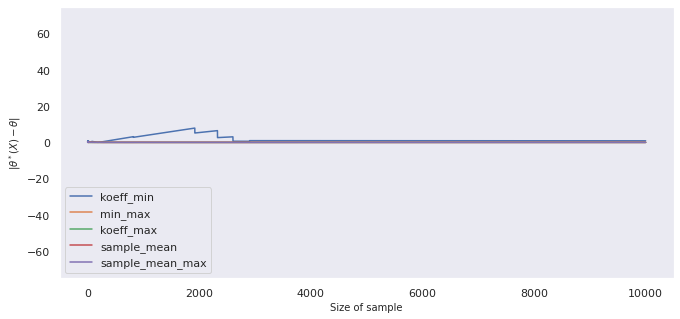

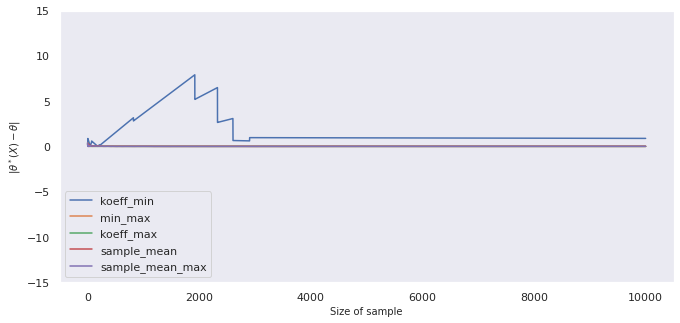

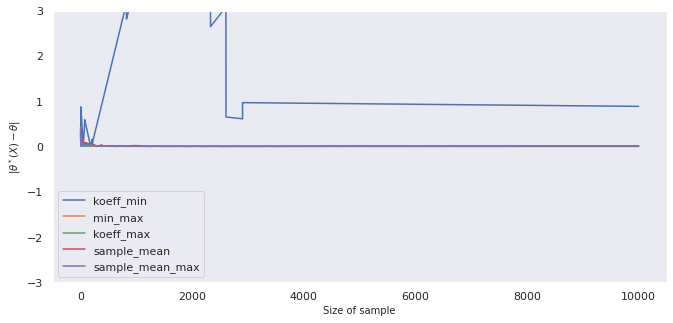

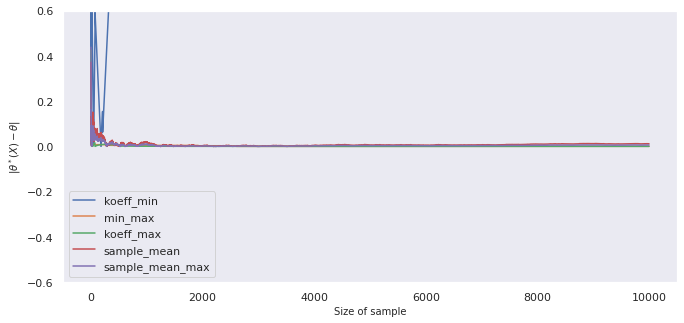

In [20]:
# Отобразим график функции модуля разности оценкии и истинного значения theta
def Plot(figsize_x, figsize_y, ylim_a, ylib_b):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    plt.plot(np.linspace(1., N, N), abs(koeff_min - theta), label='koeff_min')
    plt.plot(np.linspace(1., N, N), abs(min_max - theta), label='min_max')
    plt.plot(np.linspace(1., N, N), abs(koeff_max - theta), label='koeff_max')
    plt.plot(np.linspace(1., N, N), abs(sample_mean - theta), label='sample_mean')
    plt.plot(np.linspace(1., N, N), abs(sample_mean_max - theta), label='sample_mean_max')
   
    plt.ylim(ylim_a, ylib_b)
    
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$|\theta^*(X) - \theta|$', fontsize='10')
    plt.grid()
    plt.legend(fontsize=11, loc=3)
    plt.show()

    
Plot(11,5,-75,75)
Plot(11,5,-15,15)
Plot(11,5,-3,3)
Plot(11,5,-0.6,0.6)

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ Самыми точными (в смысле упомянутого модуля разности при $n = N$) оказались оценки $X_{(1)} + X_{(n)},\ \frac{n+1}{n}X_{(n)}$. Исключим из дальнейших экспериментов оценку $(n + 1)X_{(1)}$, поскольку она отличается очень сильно от истинного значения $\theta$.


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

In [21]:
# Сгенерируем выборку для значения theta = 10.
theta = 10
sample = uniform.rvs(size=N, scale=theta)

# Посчитаем оценки для всех n (забудем про koeff_min).
min_max = np.array([np.min(sample[ : n + 1]) + np.max(sample[ : n + 1]) for n in range(N)])
koeff_max = np.array([(n + 1) / n * np.max(sample[ : n]) for n in range(1, N + 1, 1)])
sample_mean = sample.cumsum() * [2 / n for n in range(1, N + 1, 1)]
sample_mean_max = sample.cumsum() /  [n for n in range(1, N + 1, 1)]  + [np.max(sample[ : n + 1])/2 for n in range(N)]

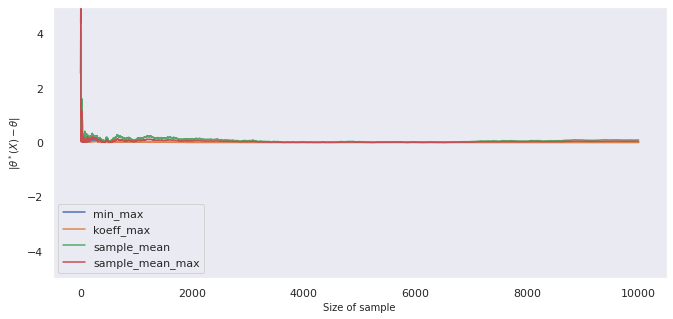

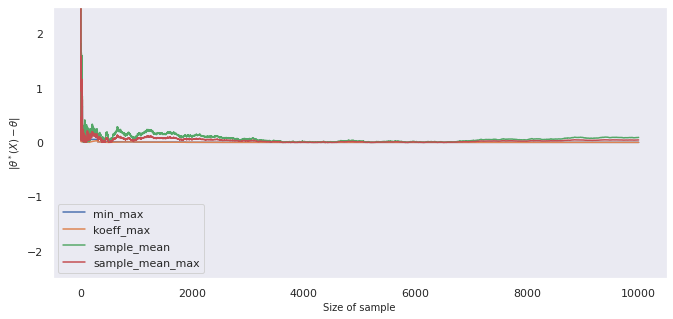

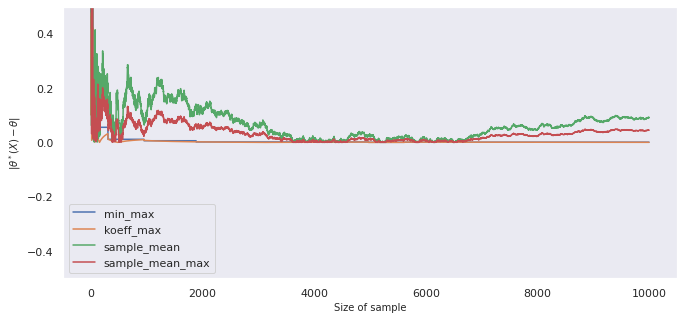

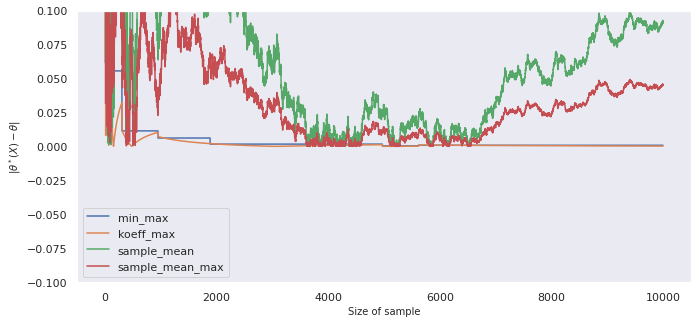

In [22]:
# Отобразим график функции модуля разности оценкии и истинного значения theta
def Plot(figsize_x, figsize_y, ylim_a, ylib_b):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    plt.plot(np.linspace(1., N, N), abs(min_max - theta), label='min_max')
    plt.plot(np.linspace(1., N, N), abs(koeff_max - theta), label='koeff_max')
    plt.plot(np.linspace(1., N, N), abs(sample_mean - theta), label='sample_mean')
    plt.plot(np.linspace(1., N, N), abs(sample_mean_max - theta), label='sample_mean_max')
   
    plt.ylim(ylim_a, ylib_b)
    
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$|\theta^*(X) - \theta|$', fontsize='10')
    plt.grid()
    plt.legend(fontsize=11, loc=3)
    plt.show()

    
Plot(11,5,-5,5)
Plot(11,5,-2.5,2.5)
Plot(11,5,-0.5,0.5)
Plot(11,5,-0.1,0.1)

Уберем оценки $2\bar{X},\ \bar{X} + \frac{X_{(n)}}{2}$
Дальше их не будем рассмотривать.

In [23]:
# Сгенерируем еще для значения theta = 0.5.
theta = 0.5
sample = uniform.rvs(size=N, scale=theta)

# Посчитаем оценки для каждого n.
koeff_max = np.array([(n + 1) / n * np.max(sample[ : n]) for n in range(1, N + 1, 1)])
min_max = np.array([np.min(sample[ : n + 1]) + np.max(sample[ : n + 1]) for n in range(N)])

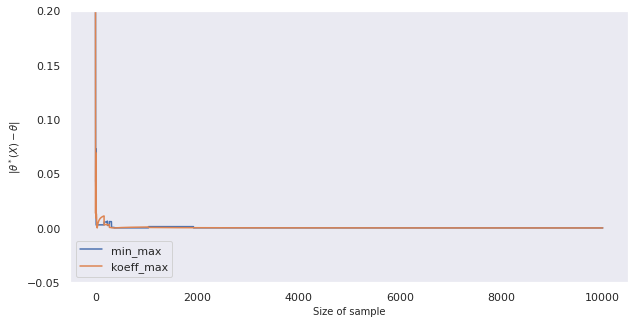

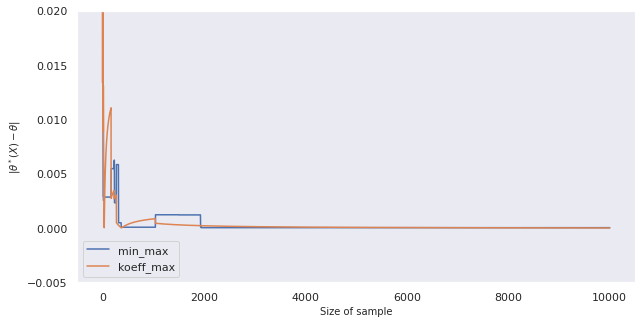

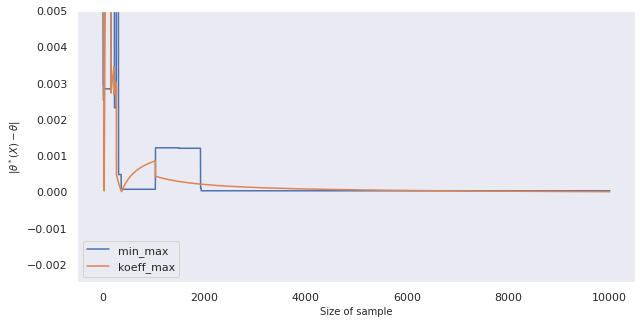

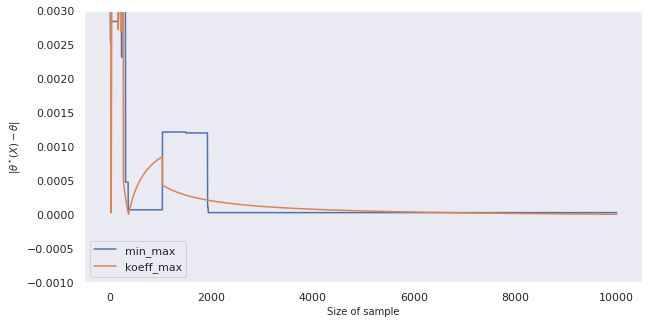

In [24]:
# Отобразим график функции модуля разности оценкии и истинного значения theta
def Plot(figsize_x, figsize_y, ylim_a, ylib_b):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    plt.plot(np.linspace(1., N, N), abs(min_max - theta), label='min_max')
    plt.plot(np.linspace(1., N, N), abs(koeff_max - theta), label='koeff_max')
   
    plt.ylim(ylim_a, ylib_b)
    
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$|\theta^*(X) - \theta|$', fontsize='10')
    plt.grid()
    plt.legend(fontsize=11, loc=3)
    plt.show()

Plot(10,5,-0.05,0.2)  
Plot(10,5,-0.005,0.02)
Plot(10,5,-0.0025,0.005)
Plot(10,5,-0.001,0.003)

Сделайте вывод.


__Вывод:__ Самая плохая оценка $(n + 1)X_{(1)}$. Самыми точными (в смысле упомянутого модуля разности при $n = N$) оказались оценки $X_{(1)} + X_{(n)},\ \frac{n+1}{n}X_{(n)}$.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [25]:
def factorial(n):
    if n in [0,1]:
        return 1
    return n * factorial(n-1)

In [26]:
factorial(5)

120

In [27]:
from scipy.stats import expon

N = 10000

# Cгенерируем выборку с параметром theta = 1.
theta = 1
sample = expon.rvs(size=N, scale=theta)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

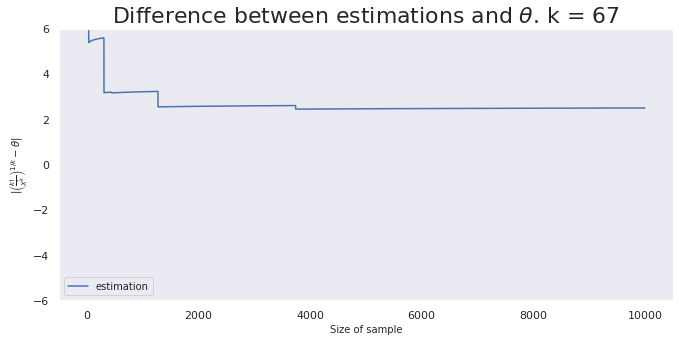

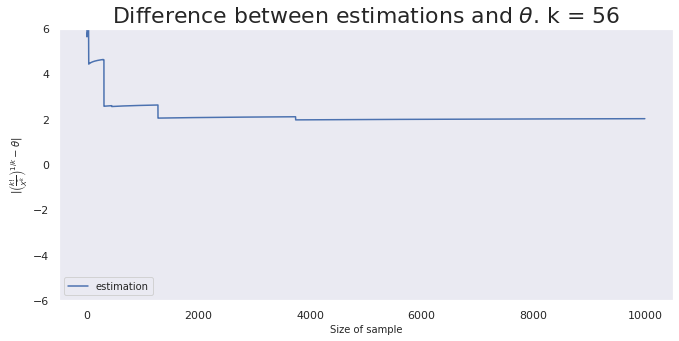

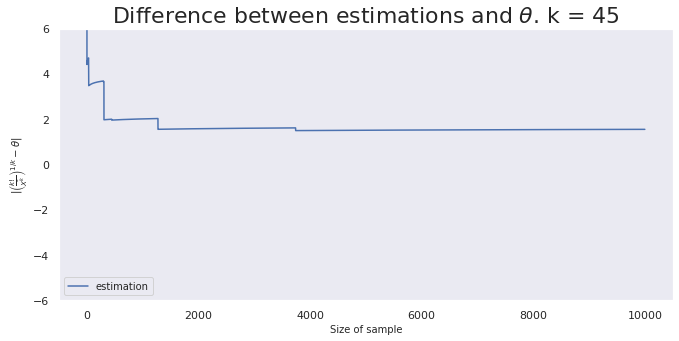

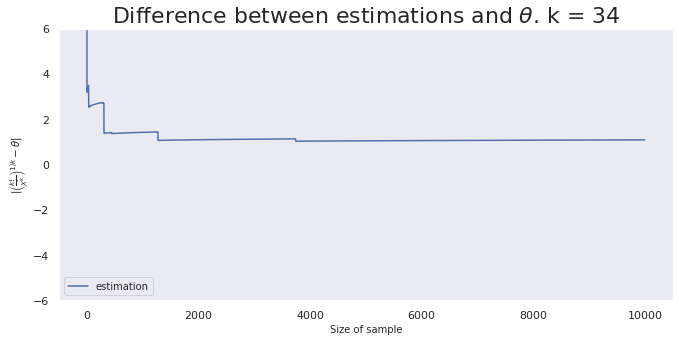

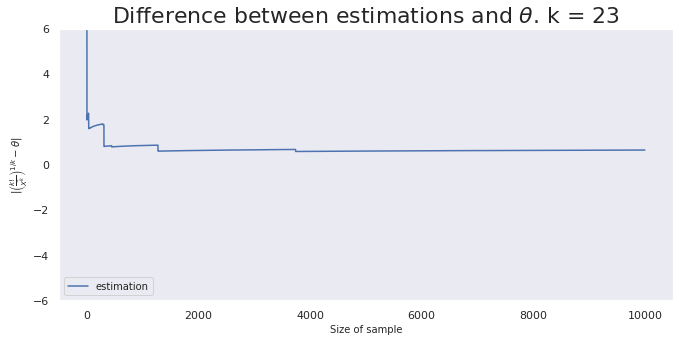

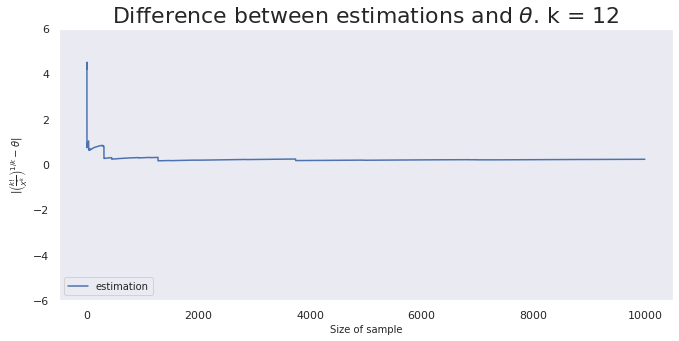

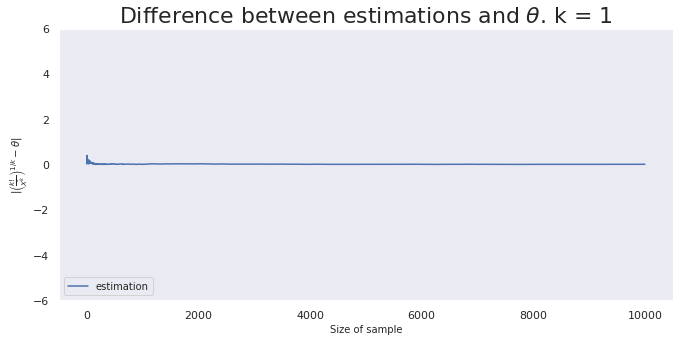

In [28]:
%matplotlib inline

# Для различных k посмотрим на разность оценки и истинного значения theta.
for k in range(67, 0, -11):
    # Найдем оценку theta для каждого n
    x = sample ** k
    e = (factorial(k) / (x.cumsum() / [n for n in range(1, N + 1, 1)]) ) ** (1/k)
    
    # График функции модуля разности оценки и истинного значения theta.
    plt.figure(figsize=(11, 5))
    plt.plot(np.linspace(1, N, N), abs(e - theta), label="estimation")

    plt.title(r'Difference between estimations and $\theta$. k = ' + str(k), fontsize=22)
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$\left|\left(\frac{k!}{\bar{X^k}}\right)^{1/k} - \theta\right|$', fontsize='10')
    plt.legend(fontsize=10, loc=3)
    plt.ylim(-6, 6)
    plt.grid()
    plt.show()

Сделайте вывод.
Более точная оценка достигается при $k\in \{1,\dots, 12\}$.

Теперь построим графики для каждого из этих значений $k$.


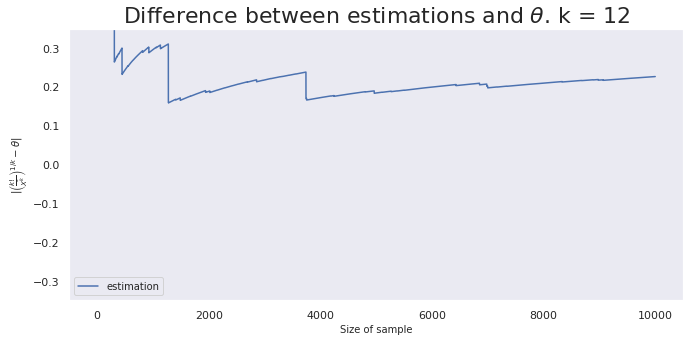

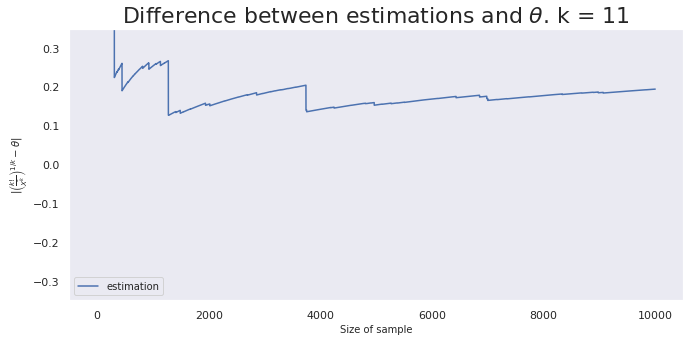

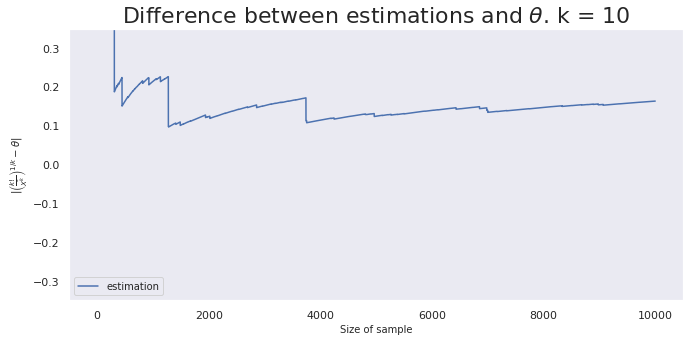

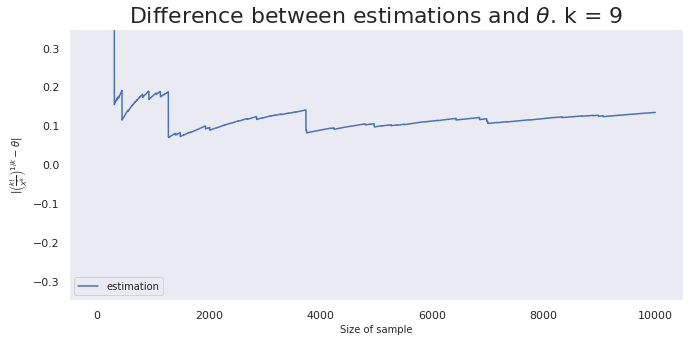

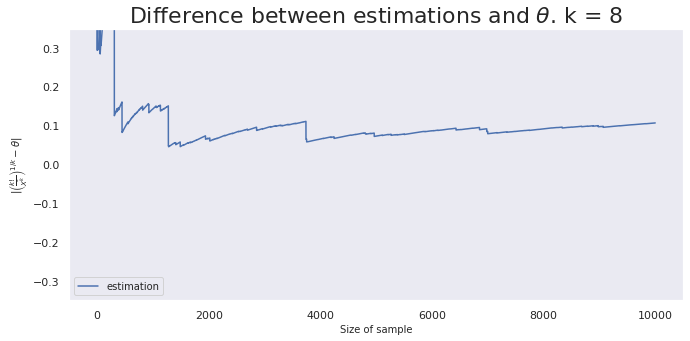

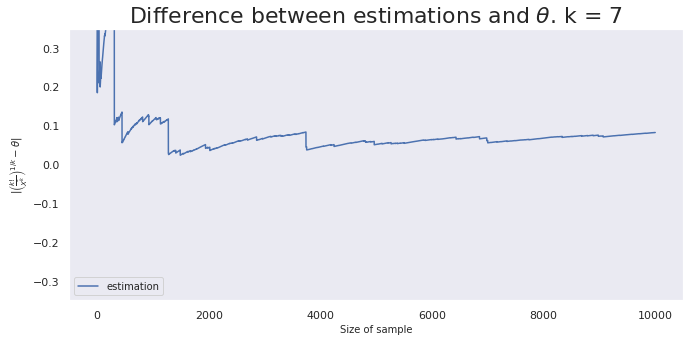

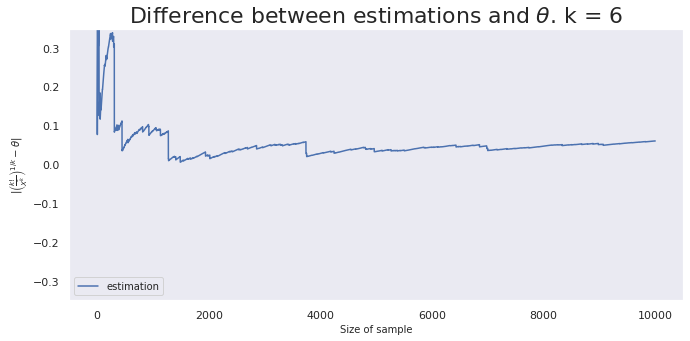

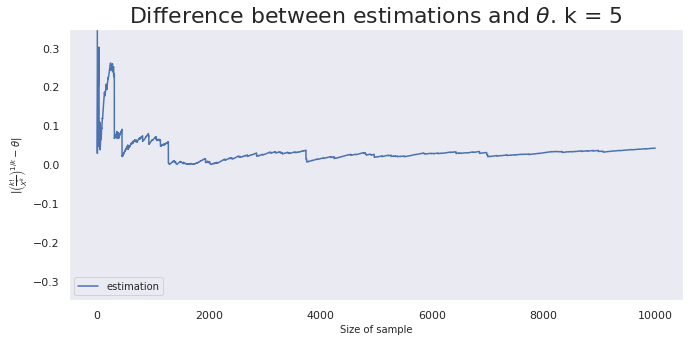

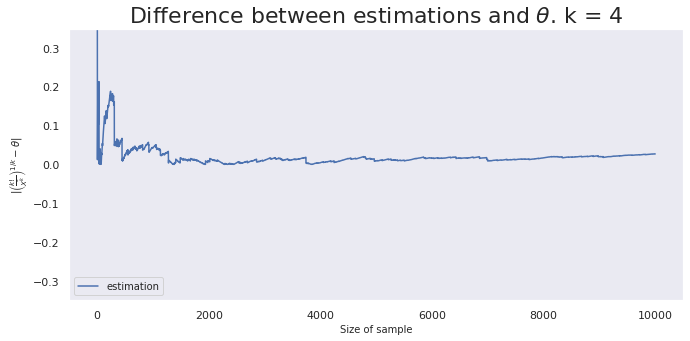

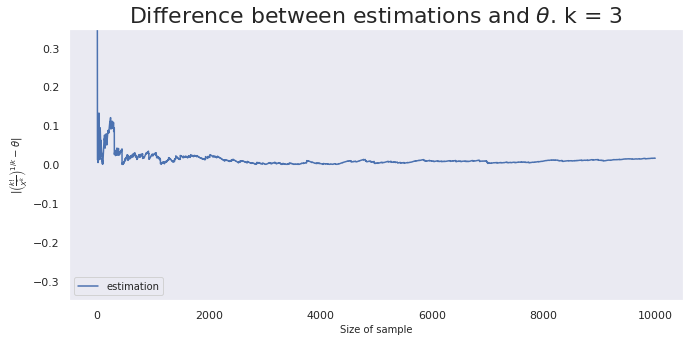

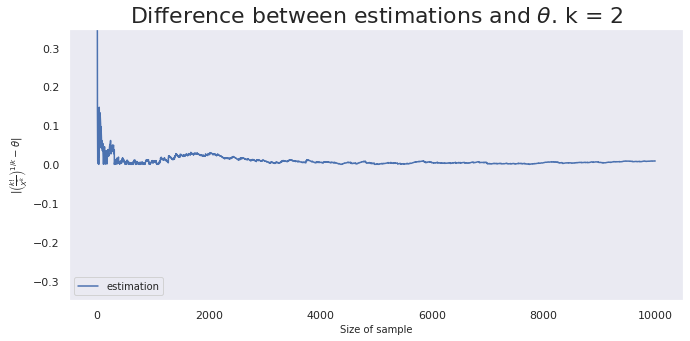

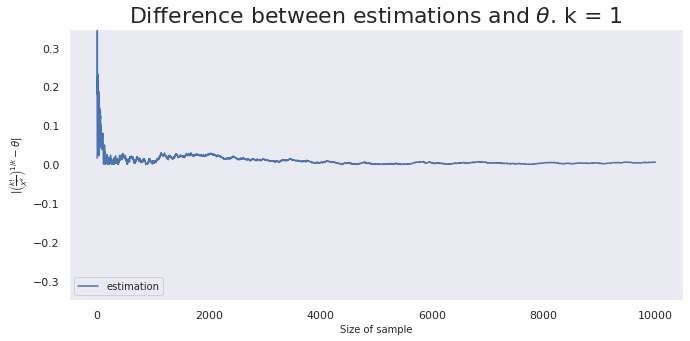

In [29]:
# Для различных k посмотрим на разность оценки и истинного значения theta.
for k in range(12, 0, -1):
    # Найдем оценку theta для каждого n
    x = sample ** k
    e = (factorial(k) / (x.cumsum() / [n for n in range(1, N + 1, 1)]) ) ** (1/k)
    
    # График функции модуля разности оценки и истинного значения theta.
    plt.figure(figsize=(11, 5))
    plt.plot(np.linspace(1, N, N), abs(e - theta), label="estimation")

    plt.title(r'Difference between estimations and $\theta$. k = ' + str(k), fontsize=22)
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$\left|\left(\frac{k!}{\bar{X^k}}\right)^{1/k} - \theta\right|$', fontsize='10')
    plt.legend(fontsize=10, loc=3)
    plt.ylim(-0.35, 0.35)
    plt.grid()
    plt.show()

__Вывод:__ Можно сделать вывод, что при больших значении $n$ данная оценка получается наиболее точной при $k\in \{1,\dots,6\}$.

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Введем на рассмотрение распредение $f_{\gamma}(x)=\gamma x^{-1-\gamma}I(x\geq 1)$ для $\gamma = 5$. Это распределение Парето.

In [30]:
from scipy.stats import pareto

# Генерируем выборку размера N = 10000 из распределения Парето.
N = 10000
sample = pareto.rvs(5, size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

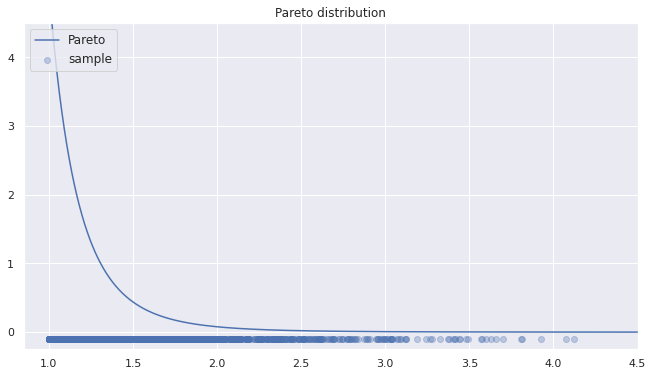

In [31]:
# График плотности распределения Парето
grid = np.linspace(1, 110, 1100000)

plt.figure(figsize=(11, 6))
plt.plot(grid, pareto.pdf(grid, 5), label='Pareto')
plt.scatter(sample, np.zeros(N) - 0.1, alpha=0.3, label='sample')

plt.ylim(-0.25, 4.5)
plt.xlim(0.85, 4.5)
plt.title(r'Pareto distribution')
plt.legend(fontsize=12, loc=2)
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [32]:
s = np.cumsum(sample ** 2) * [1/(n + 1) for n in range(N)] - (np.cumsum(sample) * [1/(n + 1) for n in range(N)]) ** 2

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

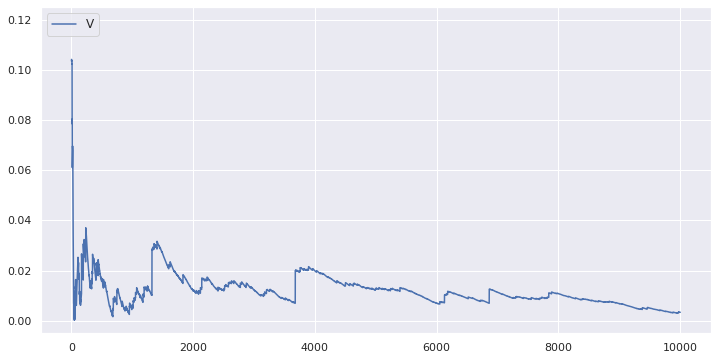

In [33]:
# Построим график зависимости модуля разности оценки дисперсии s и истинной дисперсии.
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(1, N, N), np.abs(s -  pareto.var(5)), label='V')
plt.ylim(-0.005, 0.125)
plt.legend(fontsize=12, loc=2)
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


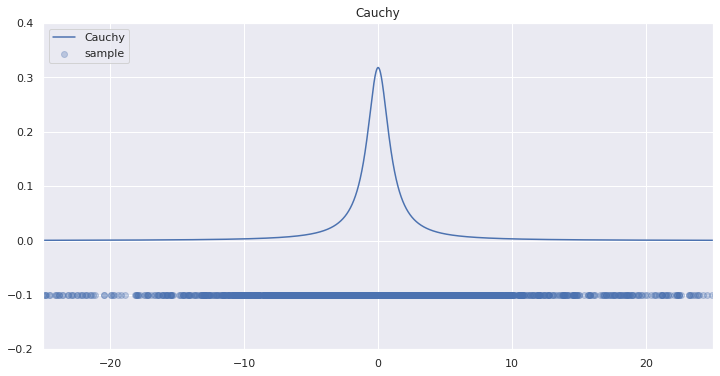

In [34]:
from scipy.stats import cauchy

# Генерируем выборку размера N = 10000 из распределения Коши.
sample = cauchy.rvs(size=N)

# Постороим график плотности распределения Коши.
grid = np.linspace(-150, 150, 1250000)  

plt.figure(figsize=(12, 6))
plt.plot(grid, cauchy.pdf(grid), label='Cauchy')
plt.scatter(sample, np.zeros(N) - 0.1, alpha=0.3, label='sample')

plt.ylim(-0.2, 0.4)
plt.xlim(-25, 25)
plt.title(r'Cauchy')
plt.legend(loc=2)
plt.show()

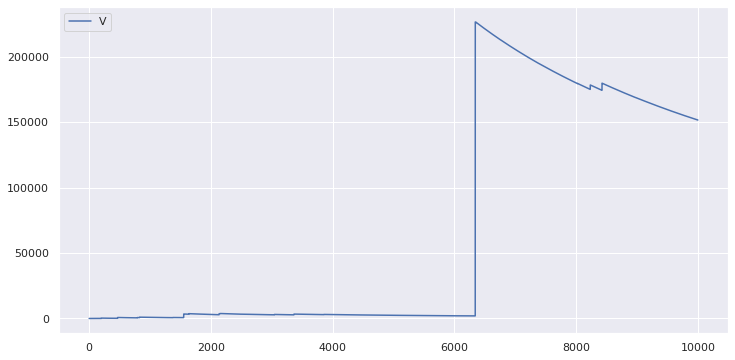

In [35]:
# Строим выборочную дисперсию
s = np.cumsum(sample ** 2) * [1/(n + 1) for n in range(N)] - (np.cumsum(sample) * [1/(n + 1) for n in range(N)]) ** 2

# Построим график зависимости выборочной дисперсии от n.
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(1, N, N), s, label='V')
plt.legend(loc=2)
plt.show()

***Вывод:*** Мы построили график плотности распределения Парето, посчитали выборочную дисперсию и построили график $|s^2 - DX_1| = f(n)$, который показал, что при больших n выборочная дисперсия не сильно отличается от истинного значения дисперсии данного распределения.

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [36]:
from scipy.stats import norm

# Выборка размера N = 10000 из стандартного нормального распределения.
N = 10000
sample = norm.rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [37]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

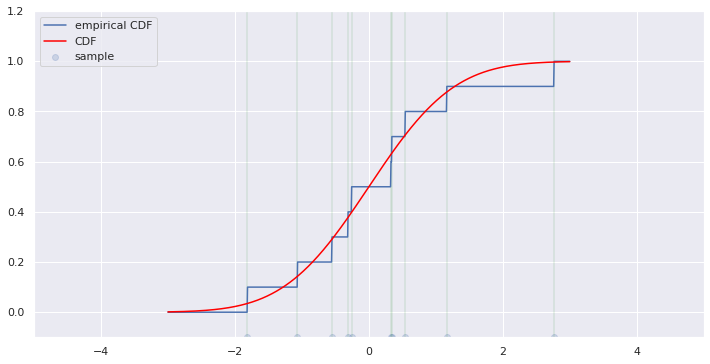

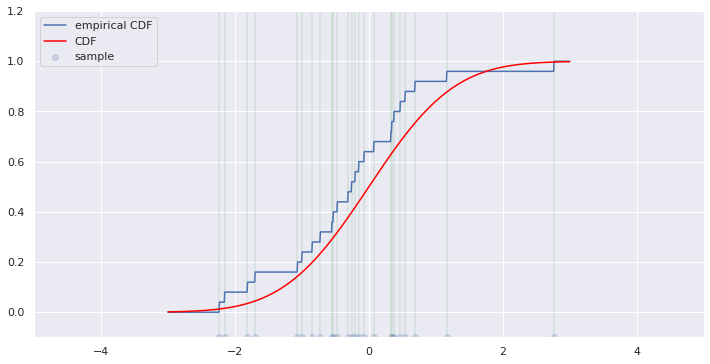

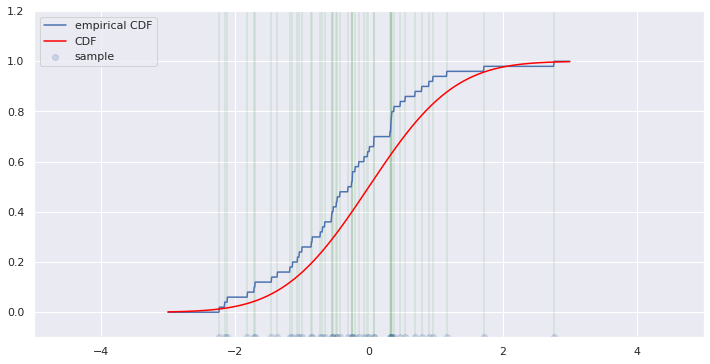

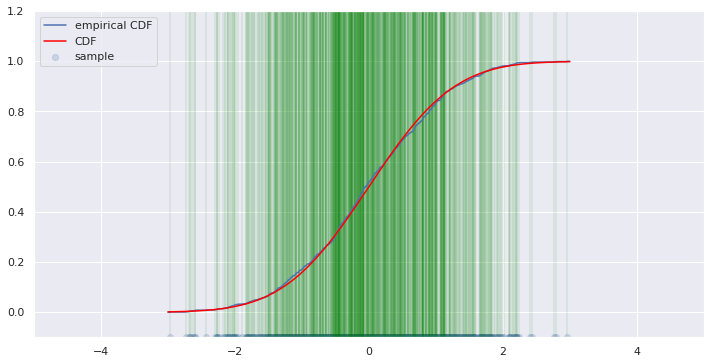

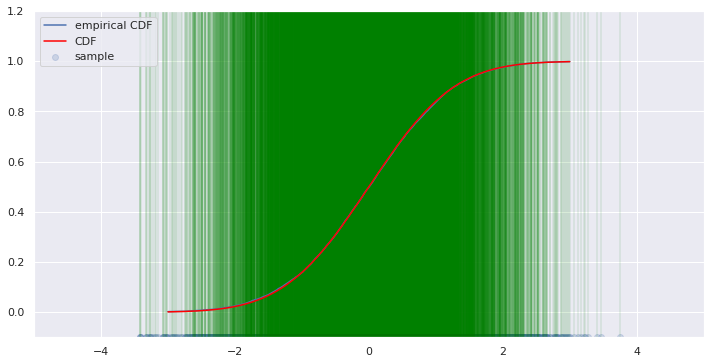

In [38]:
# Для n = 10, 25, 50, 1000, 10000 строим графики эмпирической функции распределения 
for n in [10, 25, 50, 1000, N]:
    grid = np.linspace(-3, 3, 900)
    ecdf = ECDF(sample[:n])
    emp_cdf = ecdf(grid)
    
    plt.figure(figsize=(12, 6))
    plt.plot(grid, emp_cdf, label='empirical CDF')
    plt.scatter(sample[:n], np.zeros(n) - 0.1, alpha=0.2, label='sample')
    plt.plot(grid, norm.cdf(grid), color='red', label='CDF')

    plt.errorbar(sample[:n], np.zeros(n) - 1, yerr=2*n, alpha=0.1, barsabove=True, color='green') 
        
    plt.ylim(-0.1, 1.2)
    plt.xlim(-5, 5)
    plt.legend(loc=2)
    plt.show()

Для всех $n\in N$ найдем значение $D_n=\sup_{x\in \mathbb {R}}\left|F_n(x)-F(x)\right|$.
Построим график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от n.

In [45]:
N = 10000
norm_cdf = norm.cdf(sample)  # Значения функции распределения на элементах выборках

In [46]:
Dn = np.array([np.max(np.absolute(ECDF(sample[:n])(sample[:n]) - norm_cdf[:n])) 

            for n in range(1, N + 1)]) # Статистика Dn

eps = 0.0001
Dn_eps = np.array([np.max(np.absolute(ECDF(sample[:n])(sample[:n] - eps) - norm_cdf[:n])) 
            for n in range(1, N + 1)]) # Статистика Dn_eps

In [47]:
# Каждое значение статистики Dn (назовем ее v)
# это максимум из значений Dn и Dn_eps для каждого n.
v = np.array([max(Dn[n], Dn_eps[n]) for n in range(N)])
n_v = np.array([v[n] * ((n + 1) ** 0.5) for n in range(N)])

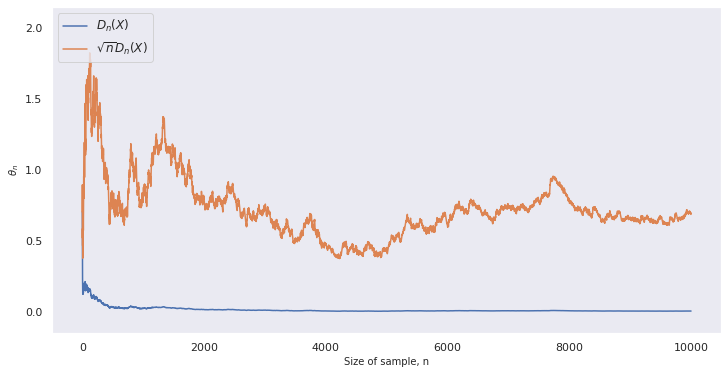

In [50]:
# Построим график
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(1, N, N), v, label='$D_n(X)$')
plt.plot(np.linspace(1, N, N), n_v, label='$\sqrt{n}D_n(X)$')

plt.ylim(-0.15, 2.15)
plt.xlabel(r'Size of sample, n', fontsize='10')
plt.ylabel(r'$\theta_n$', fontsize='10')

plt.grid()
plt.legend(fontsize=12, loc=2)

plt.show()

# Вывод

Мы рассмотрели эмпирическую функцию стандартного нормального распределения, построили ее график для разных размеров $n$ выборки и, построив график зависимости статистики $D_n=\sup_{x\in \mathbb {R}}|F_n(x)-F(x)|$ от $n$, убедились в справедливости теоремы Гливенко-Кантелли: 
$$D_n=\sup_{x\in \mathbb {R}}|F_n(x)-F(x)|\rightarrow 0 \ \ п.н. \ \ при \ \ n\rightarrow\infty.$$

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [39]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

# YOUR CODE GOES HERE

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [40]:
# YOUR CODE GOES HERE

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**:

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

AttributeError: 'NoneType' object has no attribute 'shape'

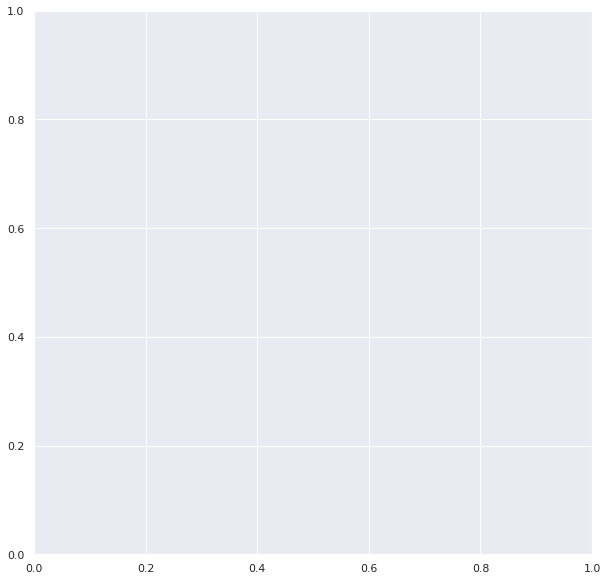

In [41]:
import statsmodels.api as sm


theta_norm = None  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

In [ ]:
# YOUR CODE GOES HERE

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.